In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.colors import ListedColormap

In [2]:
data = pd.read_csv("athlete_events.csv")
region = pd.read_csv("noc_regions.csv")

In [3]:
data.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [6]:
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [7]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [8]:
merged_data = pd.merge(data,region,on = 'NOC', how = 'left')

In [9]:
merged_data.sample(4)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
176366,88685,Anna Marta Olichwierczuk-Jesie,F,21.0,168.0,56.0,Poland,POL,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 400 metres Hurdles,NaN,Poland,NaN
114151,57814,Tams Kss,M,28.0,200.0,94.0,Hungary,HUN,2004 Summer,2004,Summer,Athina,Water Polo,Water Polo Men's Water Polo,Gold,Hungary,NaN
65732,33641,Raymond Fabien,M,23.0,167.0,66.0,Trinidad and Tobago,TTO,1968 Summer,1968,Summer,Mexico City,Athletics,Athletics Men's 4 x 100 metres Relay,NaN,Trinidad,Trinidad and Tobago
36097,18546,Emma Claire Carrick-Anderson,F,16.0,162.0,62.0,Great Britain,GBR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Women's Combined,NaN,UK,NaN


In [10]:
merged_data.shape

(271116, 17)

In [11]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [12]:
merged_data.isna()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
2,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,True
3,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
271112,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
271113,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
271114,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True


In [13]:
merged_data.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [14]:
merged_data['Age'].fillna(value=merged_data['Age'].mean(),inplace=True)

In [15]:
merged_data['Height'].fillna(value=merged_data['Height'].mean(),inplace=True)

In [16]:
merged_data['Weight'].fillna(value=merged_data['Weight'].mean(),inplace=True)

In [17]:
merged_data['Medal'].fillna(value="Medal Not Won",inplace=True)

In [18]:
merged_data['region'].fillna(value="Region Unknown",inplace=True)

In [19]:
merged_data.drop(["notes"],axis=1,inplace=True)

In [20]:
merged_data.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
region    0
dtype: int64

In [21]:
merged_data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
271111    False
271112    False
271113    False
271114    False
271115    False
Length: 271116, dtype: bool

In [22]:
merged_data.duplicated().sum()

1385

In [23]:
merged_data.drop_duplicates(keep='first',inplace=True,)

In [24]:
merged_data.duplicated().sum()

0

In [25]:
merged_data.describe()

,ID,Age,Height,Weight,Year
count,269731.000000,269731.000000,269731.000000,269731.000000,269731.000000
mean,68264.949591,25.458303,175.338957,70.701918,1978.623073
std,39026.253843,6.056530,9.301313,12.606697,29.752055
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34655.500000,22.000000,170.000000,63.000000,1960.000000
50%,68233.000000,25.000000,175.338970,70.702393,1988.000000
75%,102111.000000,28.000000,180.000000,76.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [26]:
merged_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Medal Not Won,China
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,Medal Not Won,China
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,Medal Not Won,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,Medal Not Won,Netherlands


In [47]:
# Top 10 Countries Participated in 120 years
top_10_countries = merged_data['Team'].value_counts().nlargest(10)
top_10_countries

United States    17598
France           11817
Great Britain    11264
Italy            10213
Germany           9230
Canada            9226
Japan             8269
Sweden            8004
Australia         7512
Hungary           6492
Name: Team, dtype: int64

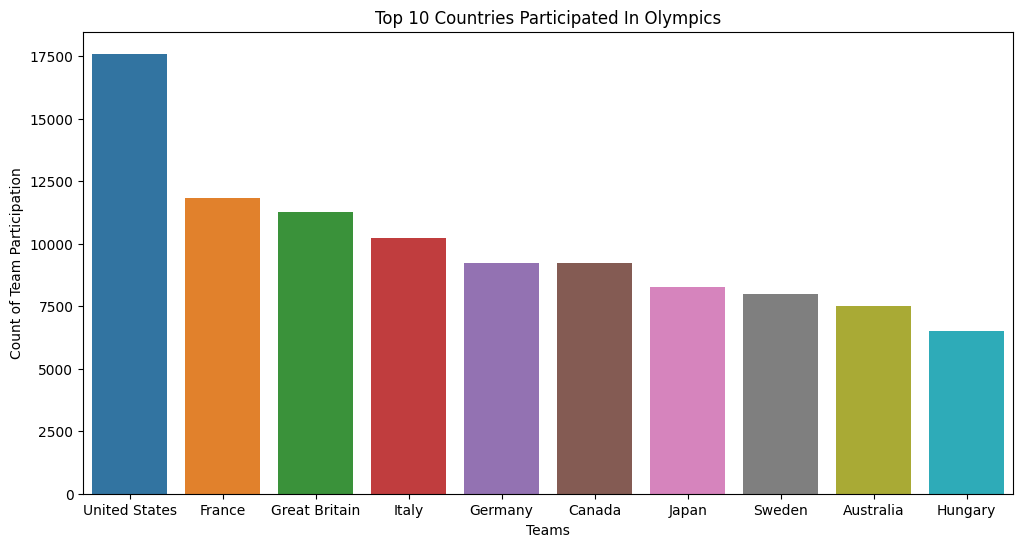

In [48]:
plt.figure(figsize=(12,6))
sns.barplot(x = top_10_countries.index,y = top_10_countries)
plt.xlabel('Teams')
plt.ylabel('Count of Team Participation')
plt.title('Top 10 Countries Participated In Olympics')
plt.show()

In [49]:
#Total Team, Regions/NOC, Events in Summer Oympics and Winter Olympics
total_count = merged_data.groupby("Season")[["Team", "NOC", "Event", "City", "Sport"]].nunique().reset_index()
total_count

,Season,Team,NOC,Event,City,Sport
0,Summer,1157,230,651,23,52
1,Winter,221,119,119,19,17


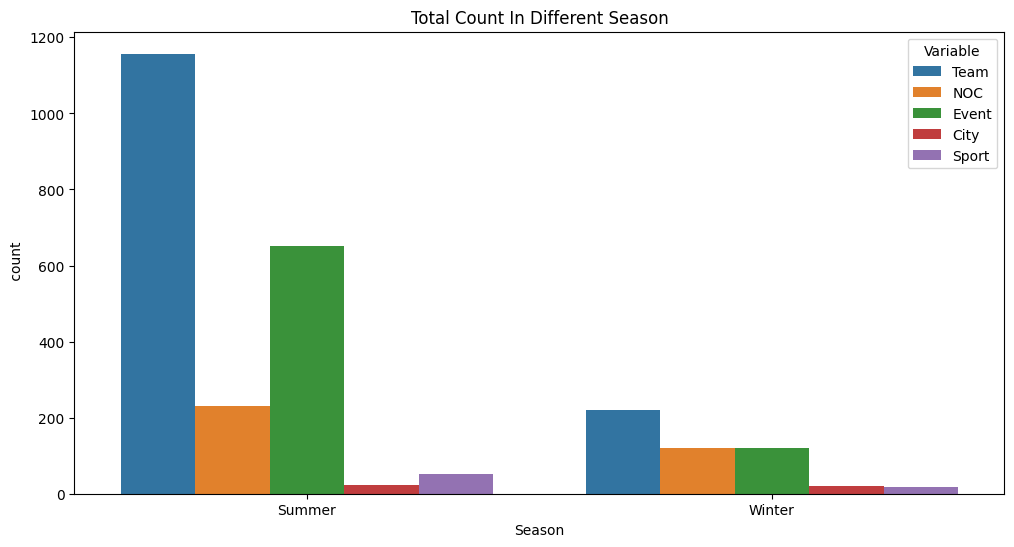

In [50]:
tidy = total_count.melt(id_vars='Season').rename(columns=str.title)


plt.subplots(figsize=(12, 6))
sns.barplot(x='Season', y='Value', hue='Variable', data=tidy)
plt.title('Total Count In Different Season')
plt.ylabel(" count")
plt.show()

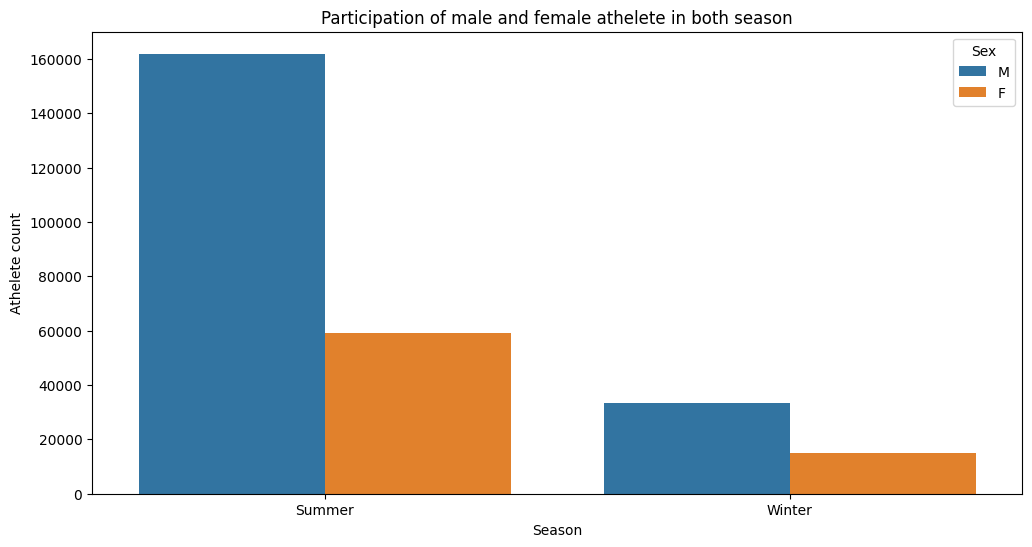

In [51]:
#Distribution According to gender  in both Season
plt.figure(figsize=(12,6))
sns.countplot(x="Season", hue="Sex", data=merged_data)
plt.title('Participation of male and female athelete in both season')
plt.ylabel("Athelete count")
plt.show()

In [52]:
#Participation based on Gender
gender_counts = merged_data.Sex.value_counts()
gender_counts

M    195353
F     74378
Name: Sex, dtype: int64

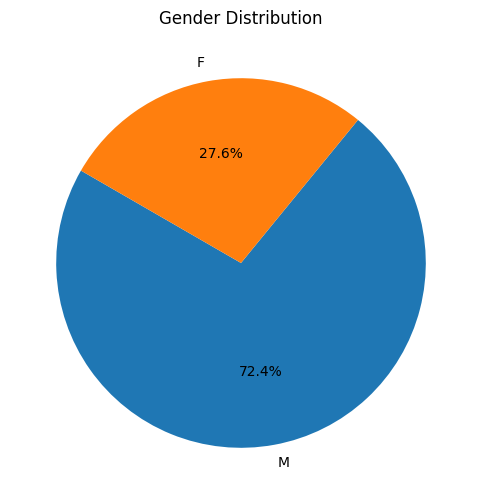

In [53]:
plt.figure(figsize=(12,6))
plt.pie(gender_counts,labels = gender_counts.index, autopct = '%1.1f%%',startangle=150 )
plt.title('Gender Distribution')
plt.show()

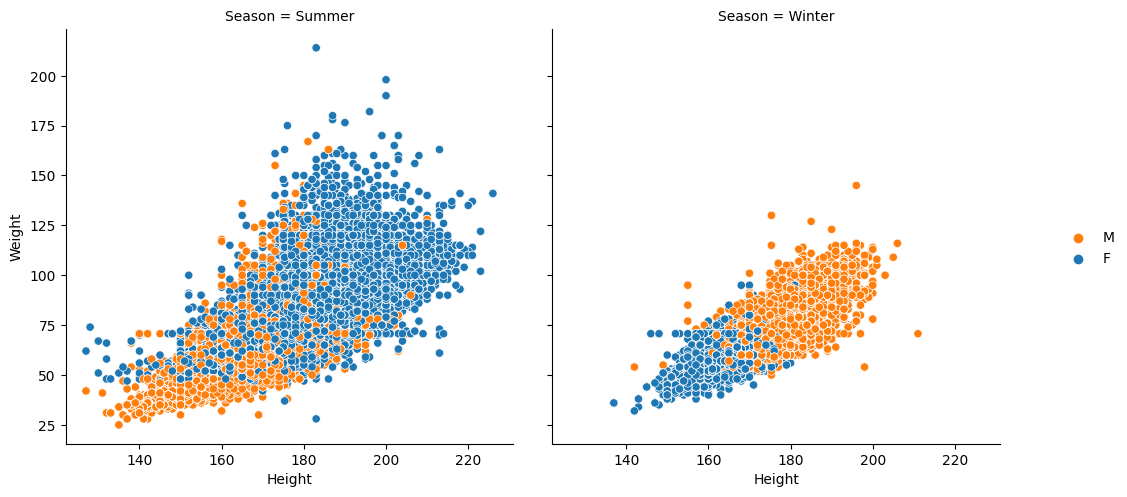

In [54]:
# Distribution of Height and Weight of Male and Female Athelete  both Seasons
merged_df = merged_data[(merged_data['Height'].notnull()) & (merged_data['Weight'].notnull())]

g = sns.FacetGrid(merged_df,col="Season")
g.map(sns.scatterplot, "Height", "Weight","Sex")
g.add_legend()
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

In [55]:
goldMedals = merged_data[(merged_data.Medal == 'Gold')]
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
42,17,Paavo Johannes Aaltonen,M,28.0,175.00000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland
44,17,Paavo Johannes Aaltonen,M,28.0,175.00000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland
48,17,Paavo Johannes Aaltonen,M,28.0,175.00000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland
60,20,Kjetil Andr Aamodt,M,20.0,176.00000,85.000000,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway


In [56]:
#Most number of medals for top 5 countries
goldMedals.region.value_counts().reset_index(name='Medal').head(10)

,index,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,677
4,Italy,575
5,France,499
6,Sweden,479
7,Canada,463
8,Hungary,432
9,Norway,378


Text(0.5, 1.0, 'Medals per Country')

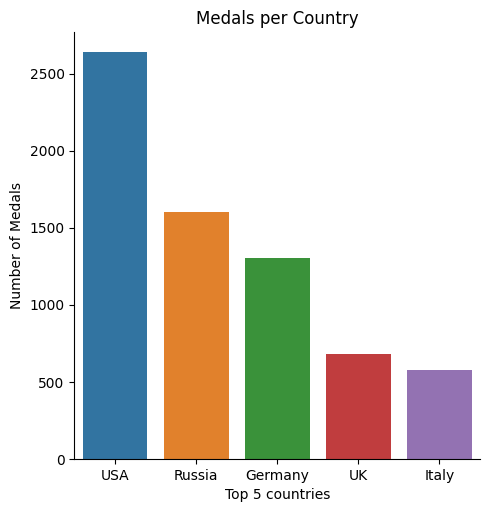

In [57]:
totalGoldMedals = goldMedals.region.value_counts().reset_index(name='Medal').head(5)
g = sns.catplot(x="index", y="Medal", data=totalGoldMedals,
                height=5, kind="bar")
#g.despine(left=True)
g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')

In [58]:
#BMI Analysis
merged_data['BMI'] = merged_data['Weight']/(merged_data['Height']/100)**2
merged_data.loc[:,['Weight', 'Height', 'BMI']].head()

,Weight,Height,BMI
0,80.000000,180.00000,24.691358
1,60.000000,170.00000,20.761246
2,70.702393,175.33897,22.997319
3,70.702393,175.33897,22.997319
4,82.000000,185.00000,23.959094


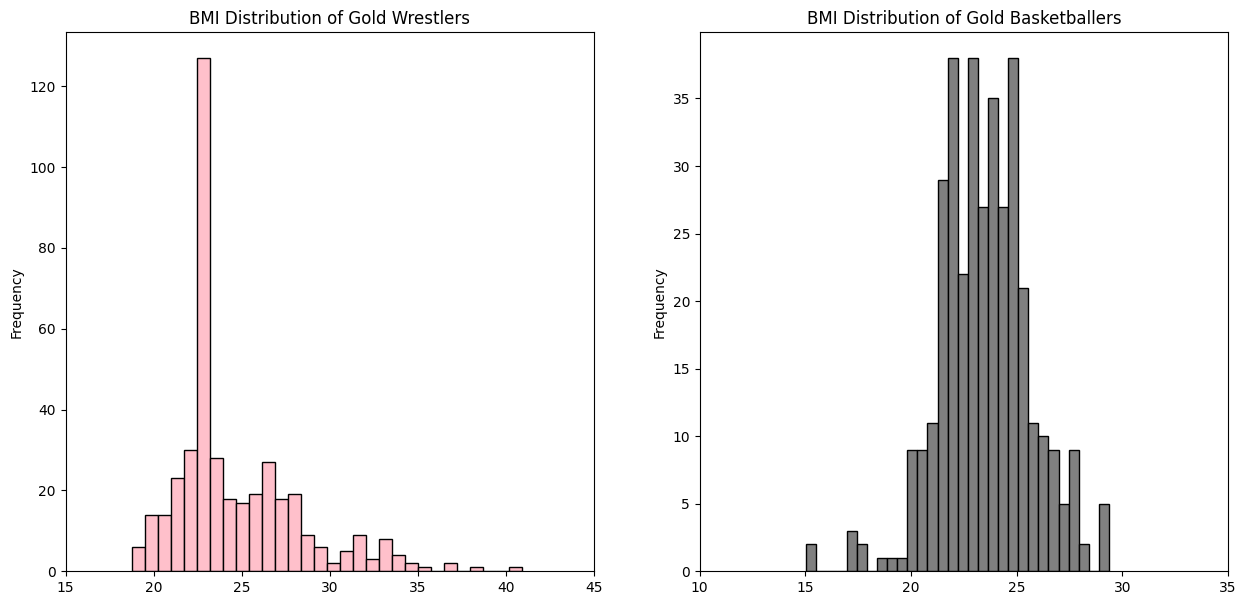

In [59]:
Wrestling=merged_data[(merged_data["Medal"]=='Gold') & (merged_data["Sport"]=='Wrestling')].loc[:,["BMI","Sport","Medal"]]    
Basketball=merged_data[(merged_data["Medal"]=='Gold') & (merged_data["Sport"]=='Basketball')].loc[:,["BMI","Sport","Medal"]]    

f,ax=plt.subplots(1,2,figsize=(15,7))

Wrestling.BMI.plot.hist(ax=ax[0],bins=30,edgecolor='black',color='pink')

ax[0].set_title('BMI Distribution of Gold Wrestlers')
x1=list(range(15,50,5))
ax[0].set_xticks(x1)
Basketball.BMI.plot.hist(ax=ax[1],bins=30,edgecolor='black',color='gray')

ax[1].set_title('BMI Distribution of Gold Basketballers')
x2=list(range(10,40,5))
ax[1].set_xticks(x2)

plt.show()


C:\Users\Mg\AppData\Local\Temp\ipykernel_12764\2790559911.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_data.Age)


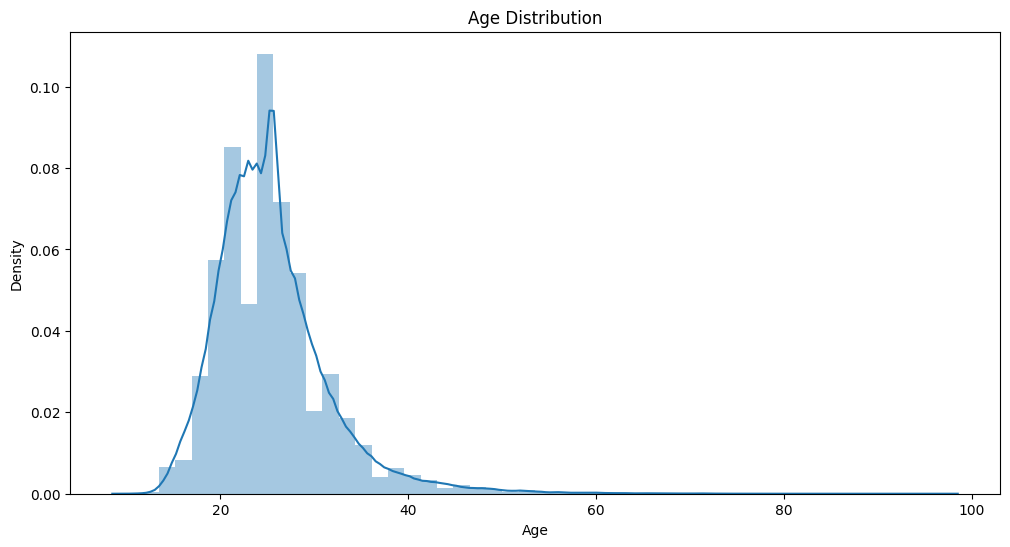

In [60]:
# Age distribution of the participants
plt.figure(figsize=(12,6))
sns.distplot(merged_data.Age)
plt.xlabel('Age')
plt.title('Age Distribution')
plt.show()